![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Annotation_Lab/Review_Functions_of_ALab_Module_SparkNLP_JSL.ipynb)

# Spark NLP for Healthcare NER Review Module for output of NLP Lab

## This tutorial provides instructions and code for the following operations:

### **Section 1: Download a sample NLP Lab project and preprocess the JSON file.** 
- Load the NLP Lab JSON file
- Preprocess JSON file for filtering an annotator

### **Section 2: Create a CONLL file and review NER annotations using a model.**
- Get the CONLL file for the annotator
- Get review files
- Display chunk reviews
- Display token reviews
- Chunk frequencies
- Scores of the annotator compared with the reference model


## **Colab Setup**

In [ ]:
import json
import os

from google.colab import files

if 'spark_jsl.json' not in os.listdir():
  license_keys = files.upload()
  os.rename(list(license_keys.keys())[0], 'spark_jsl.json')

with open('spark_jsl.json') as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)
os.environ.update(license_keys)

In [ ]:
# Installing pyspark and spark-nlp
! pip install --upgrade -q pyspark==3.1.2 spark-nlp==$PUBLIC_VERSION

# Installing Spark NLP Healthcare
! pip install --upgrade -q spark-nlp-jsl==$JSL_VERSION  --extra-index-url https://pypi.johnsnowlabs.com/$SECRET

In [5]:
import json
import os
import pandas as pd

import sparknlp
import sparknlp_jsl

import warnings
warnings.filterwarnings('ignore')

params = {"spark.driver.memory":"16G", 
          "spark.kryoserializer.buffer.max":"2000M", 
          "spark.driver.maxResultSize":"2000M"} 

spark = sparknlp_jsl.start(license_keys['SECRET'],params=params)

print("Spark NLP Version :", sparknlp.version())
print("Spark NLP_JSL Version :", sparknlp_jsl.version())

spark

Spark NLP Version : 5.0.0
Spark NLP_JSL Version : 5.0.0


## **Section 1: Download sample NLP Lab project and preprocess the json file.**

**Downlaod sample NLP Lab json file**

In [14]:
# downloading demo json
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Annotation_Lab/data/alab_demo.json

**You ca filter the sample JSON file for a specific annotator. We will analyze the selected annotator's annotations. But you can directly use `alab_demo.json` for all JSON review, too.**

In [15]:
# this function filters the annotations by the annotator then saves the processed JSON file
def filter_by_annotator(json_file_name, annotator, output_file_name):

    filtered_json = []

    # open input file
    with open(json_file_name, "r",encoding="utf-8") as f:
        exports = json.load(f)

    # get the completions of annotator
    for export in exports:
        for completion in export['completions']:
            if completion['created_username'] == annotator:
                filtered_json.append(export)
    
    #save output json file
    with open(output_file_name, "w") as f:
        json.dump(filtered_json, f)

In [16]:
# filter json file by annotator
filter_by_annotator("alab_demo.json", "hasham", "annotator_1.json")

## **Section 2: Create conll file and review NER annotations using a model**

**Initialize AnnotationLab module**

In [17]:
from sparknlp_jsl.alab import AnnotationLab
alab = AnnotationLab()

**Convert the processed JSON file into a CoNLL format**

In [18]:
alab.get_conll_data(
    
    # required: Spark session with spark-nlp-jsl jar
    spark=spark,

    # required: path to Annotation Lab JSON export
    input_json_path="annotator_1.json",

    # required: name of the CoNLL file to save
    output_name="annotator_1",

    # optional: path for CoNLL file saving directory, defaults to 'exported_conll'
    save_dir=".",

    # optional: set to True to select ground truth completions, False to select latest completions, 
    # defaults to False
    ground_truth=True,
    
    # optional: labels to exclude from CoNLL; these are all assertion labels and irrelevant NER labels, 
    # defaults to empty list
    excluded_labels=['ABSENT', 'DATE'],
    
    # optional: set a pattern to use regex tokenizer, defaults to regular tokenizer if pattern not defined  
    # regex_pattern="\\s+|(?=[-.:;*+,$&%\\[\\]])|(?<=[-.:;*+,$&%\\[\\]])"

    # optional: list of Annotation Lab task titles to exclude from CoNLL, defaults to empty list
    # excluded_task_ids = [2, 3]
    
    # optional: list of Annotation Lab task titles to exclude from CoNLL, defaults to None
    # excluded_task_titles = ['Note 1']

)

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[ | ]sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
Download done! Loading the resource.
[ / ]

2023-08-05 15:19:46.299553: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[ | ]pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
Download done! Loading the resource.


[OK!]
Spark NLP POS LightPipeline is created
Spark NLP Token LightPipeline is created
Attempting to process: Task ID# 1
Task ID# 1 is included
Attempting to process: Task ID# 2
Task ID# 2 is included
Attempting to process: Task ID# 3
Task ID# 3 is included
Saved in location: ./annotator_1.conll

Printing first 30 lines of CoNLL for inspection:



['-DOCSTART- -X- -1- O\n\n',
 'On II II O\n',
 '18/08 MC MC O\n',
 'patient NN NN O\n',
 'declares NNS NNS O\n',
 'she PN PN O\n',
 'has VHZ VHZ O\n',
 'a DD DD O\n',
 'headache NN NN B-PROBLEM\n',
 'since CS CS O\n',
 '06/08 MC MC O\n',
 ', NN NN O\n',
 'needs VVZ VVZ O\n',
 'to TO TO O\n',
 'get VVI VVI O\n',
 'a DD DD O\n',
 'head NN NN B-TEST\n',
 'CT NN NN I-TEST\n',
 ', NN NN O\n',
 'and CC CC O\n',
 'appears VVZ VVZ O\n',
 'anxious JJ JJ B-PROBLEM\n',
 'when CS CS O\n',
 'she PN PN O\n',
 'walks RR RR O\n',
 'fast JJ JJ O\n',
 '. NN NN O\n',
 'No NN NN O\n',
 'alopecia NN NN B-PROBLEM\n',
 'noted VVNJ VVNJ O\n']

**We didn't train a NER model previously, but for reference we will download the `ner_clinical` model and compare annotations against it.**

In [19]:
from sparknlp.pretrained import ResourceDownloader

# download a pretrained model as reference model to our annotations. You can use any trained model as reference.
model_name="ner_clinical_en_3.0.0_3.0_1617208419368"

#The first argument is the path to the zip file and the second one is the folder.
ResourceDownloader.downloadModelDirectly(f"clinical/models/{model_name}.zip","cache_pretrained")

**The downloaded model is saved in the `/root/cache_pretrained` folder in colab. You can use your previously trained NER model or any related NER model here.**

**Currently review module uses [embeddings_clinical](https://nlp.johnsnowlabs.com/2020/01/28/embeddings_clinical_en.html) to use with NER model**


**Get the review files**

In [24]:
chunk,token, freq, metrics = alab.review_annotations(spark, conll_path="annotator_1.conll", ner_model_path=f"/root/cache_pretrained/{model_name}")

Conll file read successfully
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]


2023-08-05 15:25:10.937365: W external/org_tensorflow/tensorflow/core/common_runtime/colocation_graph.cc:1218] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
AssignSub: CPU 
AddV2: CPU 
ScatterAdd: CPU 
NoOp: CPU 
Sqrt: CPU 
UnsortedSegmentSum: CPU 
RealDiv: CPU 
Const: CPU 
StridedSlice: CPU 
RandomUniform: CPU 
Unique: CPU 
Mul: CPU 
Add: CPU 
VariableV2: CPU 
Assign: CPU 
Identity: CPU 
Shape: CPU 
Cast: CPU 
Sub: CPU 
Gat

Model results extracted successfully
Token based comparison generated successfully
Chunk based comparison generated successfully
Chunk frequencies generated successfully


Metrics generated successfully


### Chunk review

**Chunk based reviews are displayed below. You can find problematic annotations or mismatched labeling with the reference model. Then you can make corrections at Annotation Guideline or in annotations accordingly.**

In [25]:
chunk

,task_id,sentence,begin,end,conll_chunk,conll_label,predicted_chunk,predicted_label,match
0,1,On 18/08 patient declares she has a headache s...,34,43,NOT_LABELLED,NOT_LABELLED,a headache,PROBLEM,False
1,1,On 18/08 patient declares she has a headache s...,36,43,headache,PROBLEM,NOT_DETECTED,NOT_DETECTED,False
2,1,On 18/08 patient declares she has a headache s...,72,80,NOT_LABELLED,NOT_LABELLED,a head CT,TEST,False
3,1,On 18/08 patient declares she has a headache s...,74,80,head CT,TEST,NOT_DETECTED,NOT_DETECTED,False
4,1,On 18/08 patient declares she has a headache s...,96,102,anxious,PROBLEM,anxious,PROBLEM,True
5,1,On 18/08 patient declares she has a headache s...,129,136,alopecia,PROBLEM,alopecia,PROBLEM,True
6,1,On 18/08 patient declares she has a headache s...,159,162,pain,PROBLEM,pain,PROBLEM,True
7,2,She had no difficulty breathing and her cough ...,11,30,difficulty breathing,PROBLEM,difficulty breathing,PROBLEM,True
8,2,"At that time , physical exam showed no signs o...",15,27,physical exam,TEST,physical exam,TEST,True
9,2,Mom states she had no fever .,22,26,fever,PROBLEM,fever,PROBLEM,True


**Filter by "not matchings"**

In [26]:
chunk[chunk["match"]==False]

,task_id,sentence,begin,end,conll_chunk,conll_label,predicted_chunk,predicted_label,match
0,1,On 18/08 patient declares she has a headache s...,34,43,NOT_LABELLED,NOT_LABELLED,a headache,PROBLEM,False
1,1,On 18/08 patient declares she has a headache s...,36,43,headache,PROBLEM,NOT_DETECTED,NOT_DETECTED,False
2,1,On 18/08 patient declares she has a headache s...,72,80,NOT_LABELLED,NOT_LABELLED,a head CT,TEST,False
3,1,On 18/08 patient declares she has a headache s...,74,80,head CT,TEST,NOT_DETECTED,NOT_DETECTED,False
10,2,She had no difficulty breathing and her cough ...,36,44,NOT_LABELLED,NOT_LABELLED,her cough,PROBLEM,False
11,2,She had no difficulty breathing and her cough ...,40,44,cough,PROBLEM,NOT_DETECTED,NOT_DETECTED,False
15,2,The patient is a 5-month-old infant who presen...,74,79,NOT_LABELLED,NOT_LABELLED,a cold,PROBLEM,False
16,2,The patient is a 5-month-old infant who presen...,76,79,cold,PROBLEM,NOT_DETECTED,NOT_DETECTED,False
19,3,"One day ago , mom also noticed a tactile tempe...",31,51,NOT_LABELLED,NOT_LABELLED,a tactile temperature,PROBLEM,False
20,3,"One day ago , mom also noticed a tactile tempe...",33,51,tactile temperature,PROBLEM,NOT_DETECTED,NOT_DETECTED,False


### Token review

**Token review can be helpful for making annotations with an agreement. When you see some B- and I- tag misordering, you can discuss it with the annotation team and decide on a unique way**

In [27]:
token

,sentence,token,begin,end,conll_label,predicted_label,task_id,match
0,On 18/08 patient declares she has a headache s...,On,0,1,O,O,1,True
1,On 18/08 patient declares she has a headache s...,18/08,3,7,O,O,1,True
2,On 18/08 patient declares she has a headache s...,patient,9,15,O,O,1,True
3,On 18/08 patient declares she has a headache s...,declares,17,24,O,O,1,True
4,On 18/08 patient declares she has a headache s...,she,26,28,O,O,1,True
...,...,...,...,...,...,...,...,...
153,"One day ago , mom also noticed a tactile tempe...",gave,57,60,O,O,3,True
154,"One day ago , mom also noticed a tactile tempe...",the,62,64,O,O,3,True
155,"One day ago , mom also noticed a tactile tempe...",patient,66,72,O,O,3,True
156,"One day ago , mom also noticed a tactile tempe...",Tylenol,74,80,B-TREATMENT,B-TREATMENT,3,True


In [28]:
token[token["match"]==False]

,sentence,token,begin,end,conll_label,predicted_label,task_id,match
6,On 18/08 patient declares she has a headache s...,a,34,34,O,B-PROBLEM,1,False
7,On 18/08 patient declares she has a headache s...,headache,36,43,B-PROBLEM,I-PROBLEM,1,False
14,On 18/08 patient declares she has a headache s...,a,72,72,O,B-TEST,1,False
15,On 18/08 patient declares she has a headache s...,head,74,77,B-TEST,I-TEST,1,False
47,The patient is a 5-month-old infant who presen...,a,74,74,O,B-PROBLEM,2,False
48,The patient is a 5-month-old infant who presen...,cold,76,79,B-PROBLEM,I-PROBLEM,2,False
72,She had no difficulty breathing and her cough ...,her,36,38,O,B-PROBLEM,2,False
73,She had no difficulty breathing and her cough ...,cough,40,44,B-PROBLEM,I-PROBLEM,2,False
124,The patient is a 21-day-old male here for 2 da...,some,169,172,O,B-PROBLEM,3,False
125,The patient is a 21-day-old male here for 2 da...,mild,174,177,B-PROBLEM,I-PROBLEM,3,False


**Plot annotator_1 mismatch ratio**

Token DF size: (158, 8)
Without O labels DF size: (38, 8)


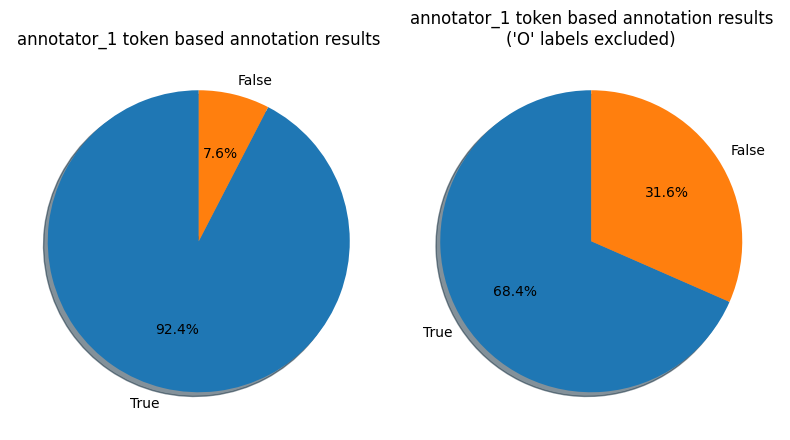

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=100)

# token df results
print("Token DF size:", token.shape)
ax1 = fig.add_subplot(121)
ax1.pie(token["match"].value_counts(), labels=[True, False], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title(f"annotator_1 token based annotation results")

# token df results without "O" labels
token_wo_O_label = token[(token["conll_label"] != "O") | (token["predicted_label"] != "O")]
print("Without O labels DF size:", token_wo_O_label.shape)
ax2 = fig.add_subplot(122)
ax2.pie(token_wo_O_label["match"].value_counts(), labels=[True, False], autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title(f"annotator_1 token based annotation results\n('O' labels excluded)")

plt.tight_layout()
plt.show()

### Chunk frequency

**Chunk frequency table helps find the most popular and rare chunks. Rare chunks may identify incorrectly labeled chunks.**

In [30]:
freq.sort_values("frequency", ascending=False)

,conll_chunk,conll_label,frequency
5,cough,PROBLEM,2
0,Tylenol,TREATMENT,1
11,head CT,TEST,1
19,suctioning yellow discharge,TREATMENT,1
18,runny nose,PROBLEM,1
17,retractions,PROBLEM,1
16,physical exam,TEST,1
15,perioral cyanosis,PROBLEM,1
14,pain,PROBLEM,1
13,mild breathing problems,PROBLEM,1


### Metrics of the annotation

**These metrics are based on the reference model. These scores are calculated regarding the reference model's output being ground truth.**

**`metrics` output is a dictionary that holds pandas data frames for scores table and some f1 scores**

In [31]:
# print metrics dictionary keys and types of values
print(*[(k,type(v)) for k,v in metrics.items()],sep="\n")

('full_chunk_metrics', <class 'pandas.core.frame.DataFrame'>)
('full_chunk_macro_f1', <class 'float'>)
('full_chunk_micro_f1', <class 'float'>)
('partial_chunk_metrics', <class 'pandas.core.frame.DataFrame'>)
('partial_chunk_macro_f1', <class 'float'>)
('partial_chunk_micro_f1', <class 'float'>)


In [32]:
metrics["full_chunk_metrics"]

,entity,tp,fp,fn,total,precision,recall,f1
0,PROBLEM,13.0,5.0,5.0,18.0,0.7222,0.7222,0.7222
1,TREATMENT,2.0,0.0,0.0,2.0,1.0000,1.0000,1.0000
2,TEST,1.0,1.0,1.0,2.0,0.5000,0.5000,0.5000


In [33]:
metrics["partial_chunk_macro_f1"]

0.9315164220824599

In [34]:
metrics


{'full_chunk_metrics':       entity    tp   fp   fn  total  precision  recall      f1
 0    PROBLEM  13.0  5.0  5.0   18.0     0.7222  0.7222  0.7222
 1  TREATMENT   2.0  0.0  0.0    2.0     1.0000  1.0000  1.0000
 2       TEST   1.0  1.0  1.0    2.0     0.5000  0.5000  0.5000,
 'full_chunk_macro_f1': 0.7407407407407408,
 'full_chunk_micro_f1': 0.7272727272727273,
 'partial_chunk_metrics':       entity    tp   fp   fn  total  precision  recall      f1
 0    PROBLEM  24.0  5.0  0.0   24.0     0.8276     1.0  0.9057
 1  TREATMENT   4.0  0.0  0.0    4.0     1.0000     1.0  1.0000
 2       TEST   4.0  1.0  0.0    4.0     0.8000     1.0  0.8889,
 'partial_chunk_macro_f1': 0.9315164220824599,
 'partial_chunk_micro_f1': 0.9153563941299792}